# **Upwork Jobs Analysis**

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Data Overview:**

### Overview of Dataset

In [53]:
df = pd.read_csv('upwork-jobs.csv')
df.head()

,title,link,description,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,We’re looking for a talented and hardworking a...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,Job Title: Full Stack DeveloperWe are seeking ...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,I need someone to redesign my bubble.io site t...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,Join Our Growing Team!We are an innovative com...,2024-02-17 09:08:08+00:00,NaN,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,We are looking for a resource who can work par...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


### Overlooking null values in dataset

In [54]:
df.isnull().sum()

title                 0
link                  0
description           0
published_date        0
is_hourly          8229
hourly_low        30102
hourly_high       30897
budget            31185
country            1141
dtype: int64

### Looking for the count of rows and columns

In [55]:
df.shape

(53058, 9)

## **Trends and Patterns:**

### How does the distribution of published dates look like? Are there any noticeable trends or patterns over time?

In [56]:
df['published_date'] = pd.to_datetime(df['published_date'])

df['published_date_only'] = df['published_date'].dt.date

df['published_time'] = df['published_date'].dt.time

df['published_date_only'] = pd.to_datetime(df['published_date_only'])

In [57]:
df.head()

,title,link,description,published_date,is_hourly,hourly_low,hourly_high,budget,country,published_date_only,published_time
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,We’re looking for a talented and hardworking a...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN,2024-02-17,09:09:54
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,Job Title: Full Stack DeveloperWe are seeking ...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States,2024-02-17,09:09:17
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,I need someone to redesign my bubble.io site t...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States,2024-02-17,09:08:46
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,Join Our Growing Team!We are an innovative com...,2024-02-17 09:08:08+00:00,NaN,NaN,NaN,NaN,United States,2024-02-17,09:08:08
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,We are looking for a resource who can work par...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India,2024-02-17,09:07:42


In [58]:
pd.DataFrame(df.groupby('published_date_only')['title'].count())

,title
published_date_only,
2023-12-02,1
2023-12-05,1
2023-12-13,1
2023-12-16,1
2023-12-20,1
2023-12-21,1
2023-12-25,1
2024-01-02,2
2024-01-03,1


In [71]:
start_date = '2023-01-01'
end_date = '2023-12-31'
data_year_23 = df[(df['published_date_only'] >= start_date) & (df['published_date_only'] <= end_date)]

start_date = '2024-01-01'
end_date = '2024-12-31'
data_year_24 = df[(df['published_date_only'] >= start_date) & (df['published_date_only'] <= end_date)]

In [97]:
total_records_in_23 = pd.DataFrame(data_year_23.groupby('published_date_only')['title'].count()).shape[0]
total_records_in_24 = pd.DataFrame(data_year_24.groupby('published_date_only')['title'].count())['title'].sum()

In [101]:
print('Total records in 2023 are ',total_records_in_23)
print('Total records in 2024 are ',total_records_in_24)

Total records in 2023 are  7
Total records in 2024 are  53051


### Most Popular Coutries

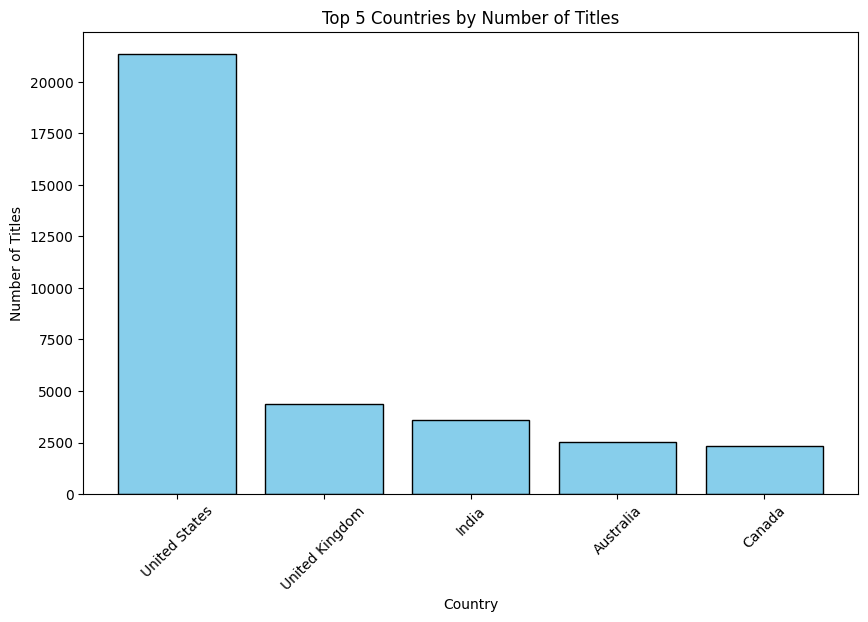

In [112]:
country_counts = df.groupby('country')['title'].count().sort_values(ascending=False)

top_countries = pd.DataFrame(country_counts).head()

plt.figure(figsize=(10, 6))
plt.bar(top_countries.index, top_countries['title'], color='skyblue', edgecolor='black')
plt.title('Top 5 Countries by Number of Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()